In [1]:
 !pip install transformers -qq
 !pip install emoji -qq

     |████████████████████████████████| 1.3MB 2.7MB/s 
     |████████████████████████████████| 2.9MB 12.8MB/s 
     |████████████████████████████████| 890kB 30.3MB/s 
     |████████████████████████████████| 1.1MB 50.4MB/s 
     |████████████████████████████████| 51kB 1.6MB/s 


In [1]:
import os
import time
import pandas as pd
import tensorflow as tf
from google.colab import files
import matplotlib.pyplot as plt

from preprocess import Preprocess
from model import VisionBertClassifier
from tensorflow.keras.applications import VGG19

%matplotlib inline
plt.style.use('dark_background')

In [3]:
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d parthplc/facebook-hateful-meme-dataset

!unzip -qq '/content/facebook-hateful-meme-dataset.zip'

Saving kaggle.json to kaggle.json
100% 3.35G/3.35G [01:57<00:00, 36.4MB/s]
100% 3.35G/3.35G [01:57<00:00, 30.5MB/s]


In [2]:
data_dir = "/content/data/"

train_samples_frame = pd.read_json('/content/data/train.jsonl', lines=True)
train_samples_frame.head()
train_samples_frame = train_samples_frame.sample(frac=1).reset_index()

train_samples_frame.label.value_counts()

0    5450
1    3050
Name: label, dtype: int64

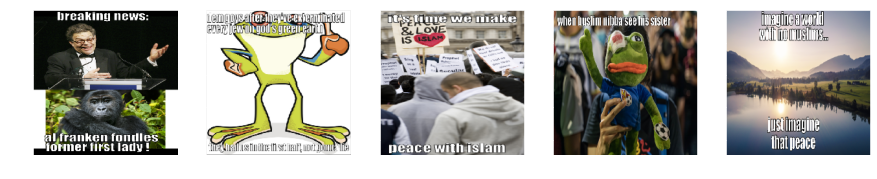

In [3]:
images = []
for i in range(5):
  image = tf.io.read_file(filename=data_dir + train_samples_frame.loc[i, "img"])
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [224,224], method='nearest')
  images.append(image)

f, axarr = plt.subplots(1,5, figsize = (15,10))
axarr[0].imshow(images[0])
axarr[1].imshow(images[1])
axarr[2].imshow(images[2])
axarr[3].imshow(images[3])
axarr[4].imshow(images[4])

In [6]:
vision_model = VGG19(weights="imagenet", include_top=False, pooling='avg')
preprocess = Preprocess(train_samples_frame, data_dir, vision_model=vision_model)
preprocess.preprocess()
cls = VisionBertClassifier()
history = cls.train(preprocess.data, vision_model=vision_model)

8500it [07:11, 19.69it/s]


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
  0%|          | 0/8500 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length`

Epoch 1/100
213/213 [==============================] - 41s 191ms/step - loss: 0.7694 - accuracy: 0.5815 - auc: 0.5205 - true_positives: 603.0000 - true_negatives: 3351.0000 - false_positives: 1000.0000 - false_negatives: 1846.0000 - val_loss: 0.6680 - val_accuracy: 0.6094 - val_auc: 0.5431 - val_true_positives: 142.0000 - val_true_negatives: 894.0000 - val_false_positives: 205.0000 - val_false_negatives: 459.0000
Epoch 2/100
213/213 [==============================] - 38s 178ms/step - loss: 0.7075 - accuracy: 0.6013 - auc: 0.5290 - true_positives: 552.0000 - true_negatives: 3537.0000 - false_positives: 814.0000 - false_negatives: 1897.0000 - val_loss: 0.6584 - val_accuracy: 0.6141 - val_auc: 0.5752 - val_true_positives: 171.0000 - val_true_negatives: 873.0000 - val_false_positives: 226.0000 - val_false_negatives: 430.0000
Epoch 3/100
213/213 [==============================] - 38s 179ms/step - loss: 0.6796 - accuracy: 0.6138 - auc: 0.5529 - true_positives: 523.0000 - true_negatives: 3651

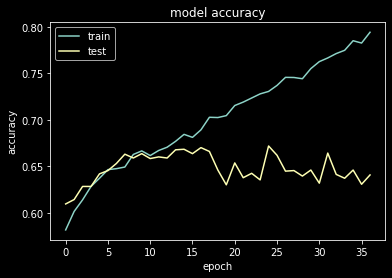

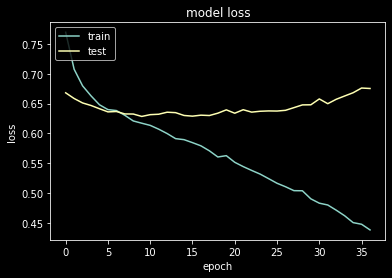

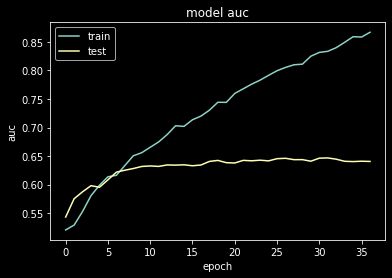

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [4]:
from tensorflow.keras.applications import VGG16

vision_model = VGG16(weights="imagenet", include_top=False, pooling='avg')
preprocess = Preprocess(train_samples_frame, data_dir, vision_model=vision_model)
preprocess.preprocess()
cls = VisionBertClassifier()
history = cls.train(preprocess.data, vision_model=vision_model)

8500it [06:40, 21.23it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
  0%|          | 0/8500 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarnin

Epoch 1/100
213/213 [==============================] - 40s 190ms/step - loss: 0.7970 - accuracy: 0.5713 - auc: 0.5149 - true_positives: 633.0000 - true_negatives: 3252.0000 - false_positives: 1107.0000 - false_negatives: 1808.0000 - val_loss: 0.6649 - val_accuracy: 0.5900 - val_auc: 0.5917 - val_true_positives: 259.0000 - val_true_negatives: 744.0000 - val_false_positives: 347.0000 - val_false_negatives: 350.0000
Epoch 2/100
213/213 [==============================] - 38s 178ms/step - loss: 0.7129 - accuracy: 0.5928 - auc: 0.5370 - true_positives: 609.0000 - true_negatives: 3422.0000 - false_positives: 937.0000 - false_negatives: 1832.0000 - val_loss: 0.6405 - val_accuracy: 0.6365 - val_auc: 0.6036 - val_true_positives: 117.0000 - val_true_negatives: 965.0000 - val_false_positives: 126.0000 - val_false_negatives: 492.0000
Epoch 3/100
213/213 [==============================] - 38s 177ms/step - loss: 0.6838 - accuracy: 0.6078 - auc: 0.5518 - true_positives: 484.0000 - true_negatives: 3649

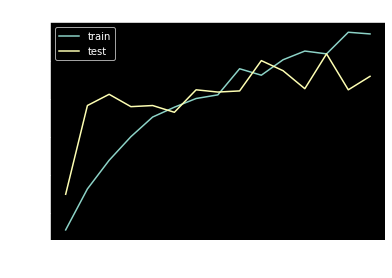

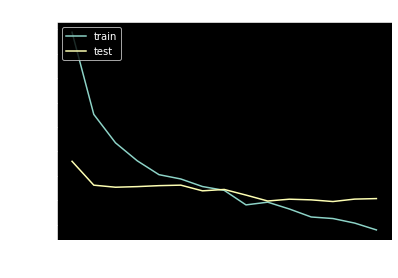

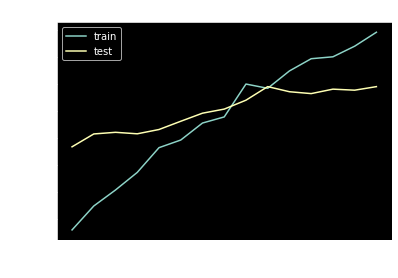

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for auc
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()